In [1]:
%cd "E:\AIML\Project 1\Ensemble Technique"

E:\AIML\Project 1\Ensemble Technique


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,minmax_scale,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
from statistics import median,mean


from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score


C:\Users\rushi\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
Dataframe =pd.read_csv('bank-full.csv')
Dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory Data Analysis (EDA)

In [4]:
Dataframe.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
print('\033[1m' ' Number of rows in dataframe',Dataframe.shape[0])
print('\033[1m' ' Number of columns in dataframe',Dataframe.shape[1])

 Number of rows in dataframe 45211
 Number of columns in dataframe 17


In [6]:
Dataframe.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


In [7]:

Dataframe[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = Dataframe[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
Dataframe.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [8]:
Dataframe.isnull().sum().to_frame().T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
Dataframe['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
Dataframe['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [11]:
Dataframe['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
Dataframe['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
Dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [14]:
Dataframe.loc[Dataframe['pdays']== 999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


C:\Users\rushi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rushi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rushi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

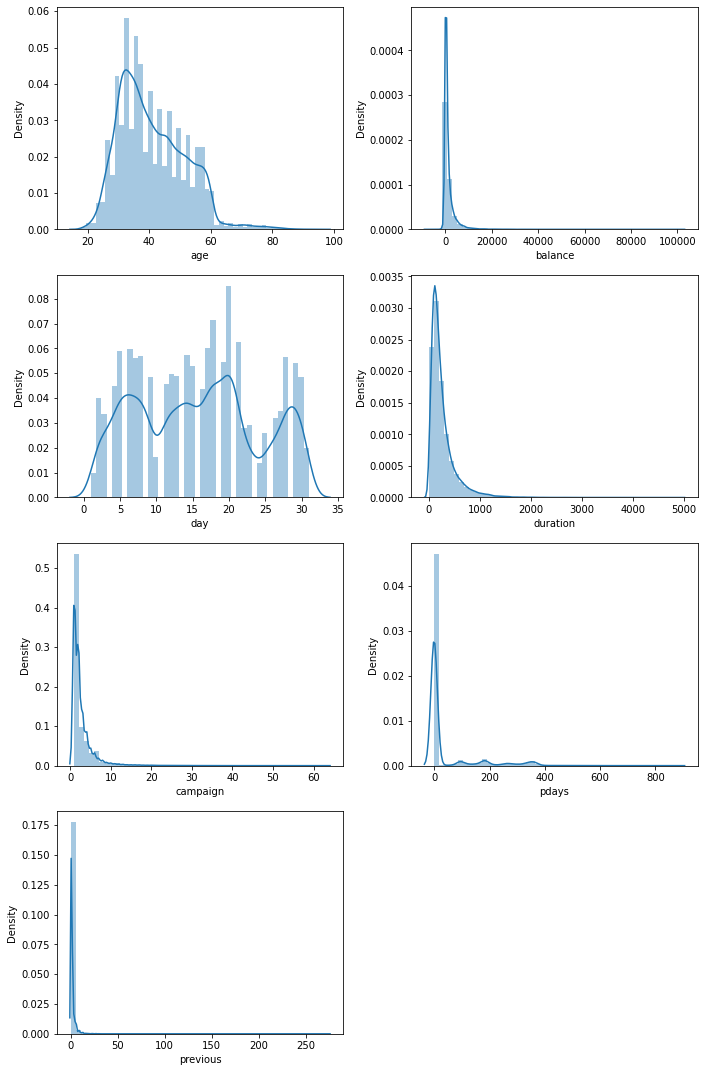

In [15]:
fig,axe = plt.subplots(nrows=4, ncols=2 , figsize =(10,15))
axe = axe.flatten()
sns.distplot(Dataframe['age'],ax=axe[0])
sns.distplot(Dataframe['balance'],ax=axe[1])
sns.distplot(Dataframe['day'],ax=axe[2])
sns.distplot(Dataframe['duration'],ax=axe[3])
sns.distplot(Dataframe['campaign'],ax=axe[4])
sns.distplot(Dataframe['pdays'],ax=axe[5])
sns.distplot(Dataframe['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

C:\Users\rushi\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


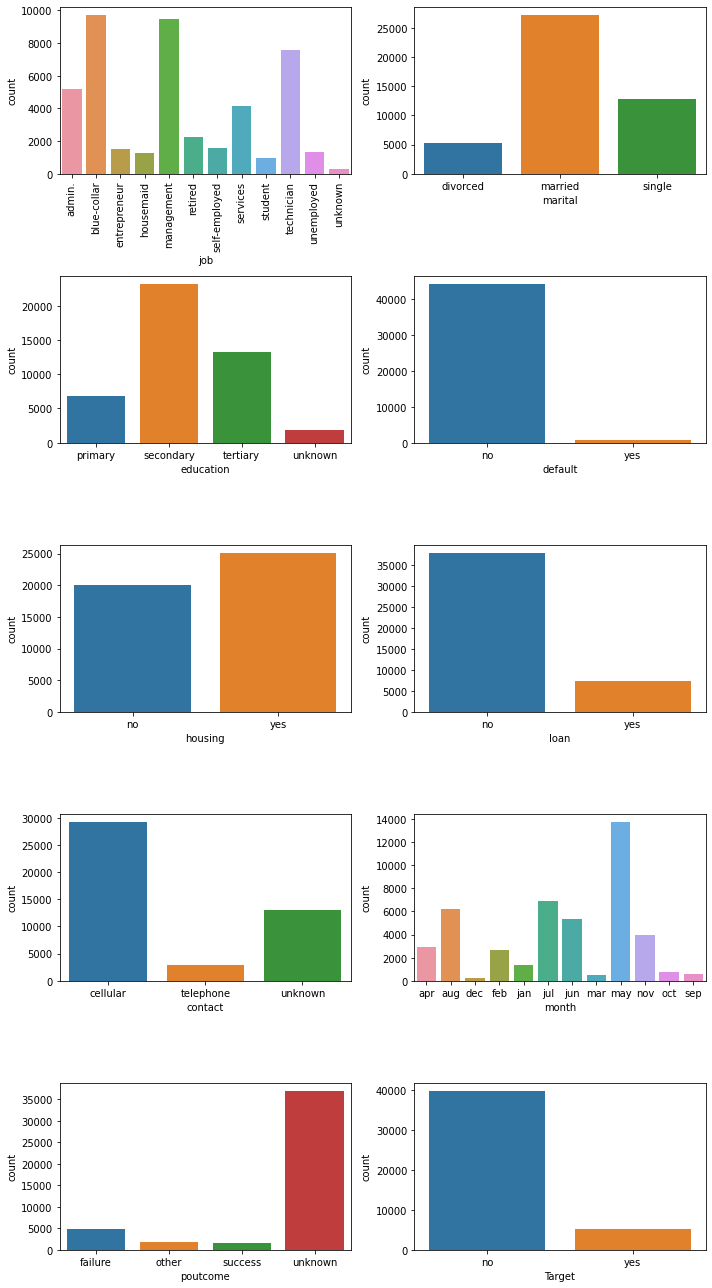

In [16]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
plot=sns.countplot(x=Dataframe['job'],data=Dataframe,ax=axe[0]) #Countplot of 'job' 
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=Dataframe['marital'],data=Dataframe,ax=axe[1]) #Countplot of 'marital' 
sns.countplot(x=Dataframe['education'],data=Dataframe,ax=axe[2]) #Countplot of 'education' 
sns.countplot(x=Dataframe['default'],data=Dataframe,ax=axe[3]) #Countplot of 'default' 
sns.countplot(x=Dataframe['housing'],data=Dataframe,ax=axe[4]) #Countplot of 'housing' 
sns.countplot(x=Dataframe['loan'],data=Dataframe,ax=axe[5]) #Countplot of 'loan' 
sns.countplot(x=Dataframe['contact'],data=Dataframe,ax=axe[6]) #Countplot of 'contact' 
sns.countplot(x=Dataframe['month'],data=Dataframe,ax=axe[7]) #Countplot of 'month' 
sns.countplot(x=Dataframe['poutcome'],data=Dataframe,ax=axe[8]) #Countplot of 'poutcome' 
sns.countplot(x=Dataframe['Target'],data=Dataframe,ax=axe[9]) #Countplot of 'target' 
fig.tight_layout() #for arranging the plots
fig.show()

# Measure of skewness of numerical columns

In [17]:
Dataframe.skew().to_frame('Skewness measure').T

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


# Checking the presence of outliers

C:\Users\rushi\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


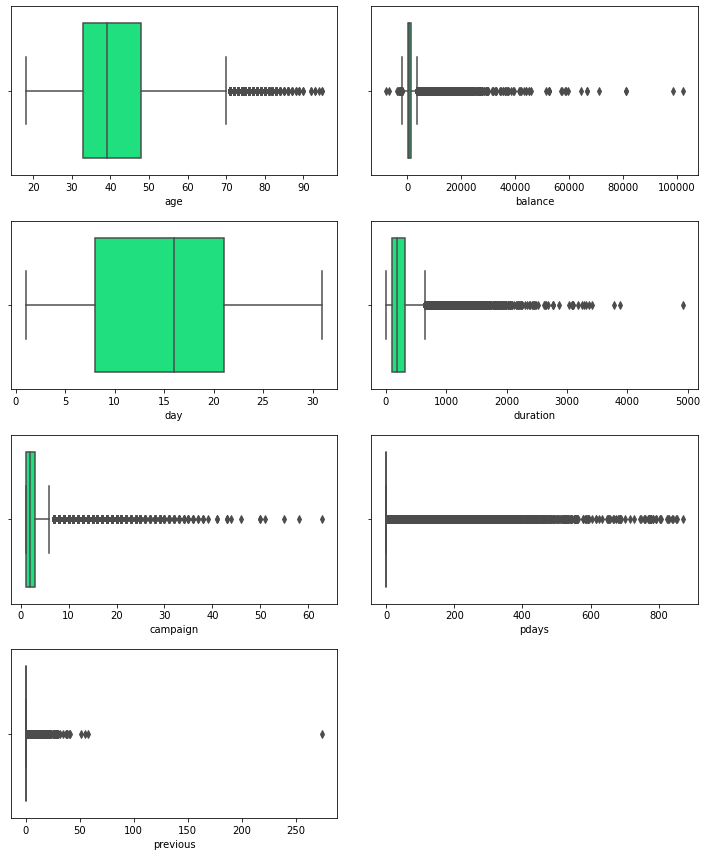

In [18]:

fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=Dataframe,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=Dataframe,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=Dataframe,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=Dataframe,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=Dataframe,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=Dataframe,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=Dataframe,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

# Distribution of Target Column

In [19]:
Dataframe['Target'].value_counts().to_frame('Target column distribution')


,Target column distribution
no,39922
yes,5289


# Data Preprocessing

Label Encoding of variables

In [20]:
df2 = Dataframe.copy() #making a copy of dataframe 'df_2'
encoder = LabelEncoder() #creating object of LabelEncoder 
df2['default'] = encoder.fit_transform(df2['default']).astype(int) #encoding 'default' column 
df2['marital'] = encoder.fit_transform(df2['marital']).astype(int) #encoding 'marital' column and assigning 1 married, 2 divorced and 3 single 
df2['loan'] = encoder.fit_transform(df2['loan']).astype(int) #encoding 'loan' column and assigning 0 no and 1 yes values
df2['housing'] = encoder.fit_transform(df2['housing']).astype(int) #encoding 'housing' column and assigning 0 no and 1 yes values
df2['Target'] = encoder.fit_transform(df2['Target']).astype(int) #encoding 'target' column and assigning 0 no and 1 yes values
df2['month'] = encoder.fit_transform(df2['month']).astype(int)#encoding 'month' column and assigning 0-11 values
df2['poutcome'] = encoder.fit_transform(df2['poutcome']).astype(int)#encoding 'month' column and assigning 0-11 values
df2['education'] = encoder.fit_transform(df2['education']).astype(int)#encoding 'month' column and assigning 0-11 values
df2.head() #displaying head of encoded dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [22]:
df2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Handeling Outliers with mean replacement

C:\Users\rushi\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Boxplots after handeling outliers


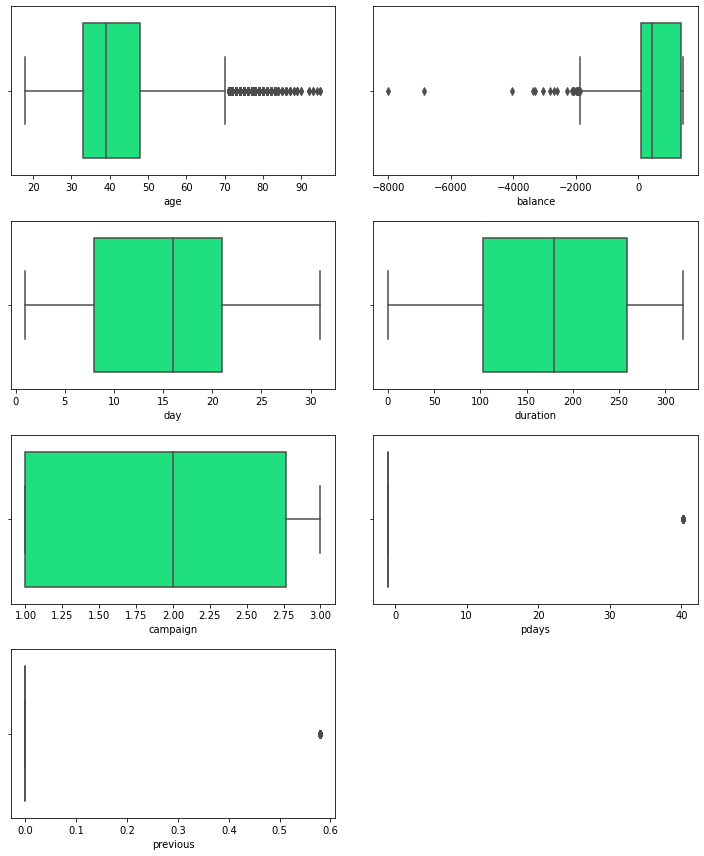

In [24]:
meanbal = float(df2['balance'].mean()) #mean balance
df2['balance'] = np.where(df2['balance'] >np.percentile(df2['balance'], 75), meanbal,df2['balance']) #replacing with mean

meandur = float(df2['duration'].mean()) #mean duration
df2['duration'] = np.where(df2['duration'] >np.percentile(df2['duration'], 75), meandur,df2['duration'])#replacing with mean

meancam = float(df2['campaign'].mean()) #mean campaign
df2['campaign'] = np.where(df2['campaign'] >np.percentile(df2['campaign'], 75), meancam,df2['campaign'])#replacing with mean

meanpd = float(df2['pdays'].mean()) #mean pdays
df2['pdays'] = np.where(df2['pdays'] >np.percentile(df2['pdays'], 75), meanpd,df2['pdays'])#replacing with mean

meanpr = float(df2['previous'].mean()) #mean previous
df2['previous'] = np.where(df2['previous'] >np.percentile(df2['previous'], 75),meanpr ,df2['previous'])#replacing with mean



fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=df2,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=df2,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=df2,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=df2,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=df2,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=df2,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=df2,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')

# Understanding from boxplots after handeling outliers
Outliers in 'age' column are not handled because it is a specific value for each record.
->After handeling Outliers in 'balance', the number of outliers on the lower side is increased.

<AxesSubplot:>

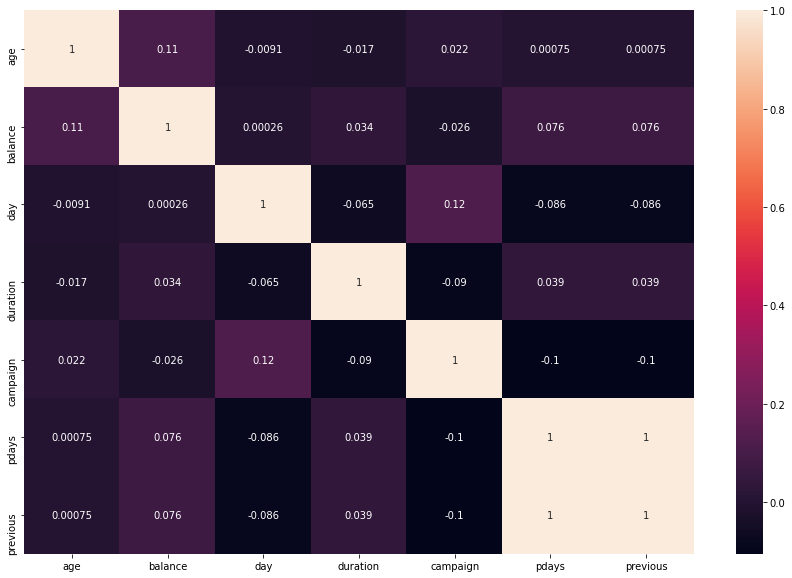

In [25]:

plt.figure(figsize=(15,10)) #for adjusting figuresize
sns.heatmap(df2.corr(),annot=True) #for correlation plot



# Understanding from above corrp plot:
'pdays' and 'previous' are highly correlated

In [26]:

df2 = df2.drop(['job','education','contact','duration','pdays','day','month'],axis=1) 
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


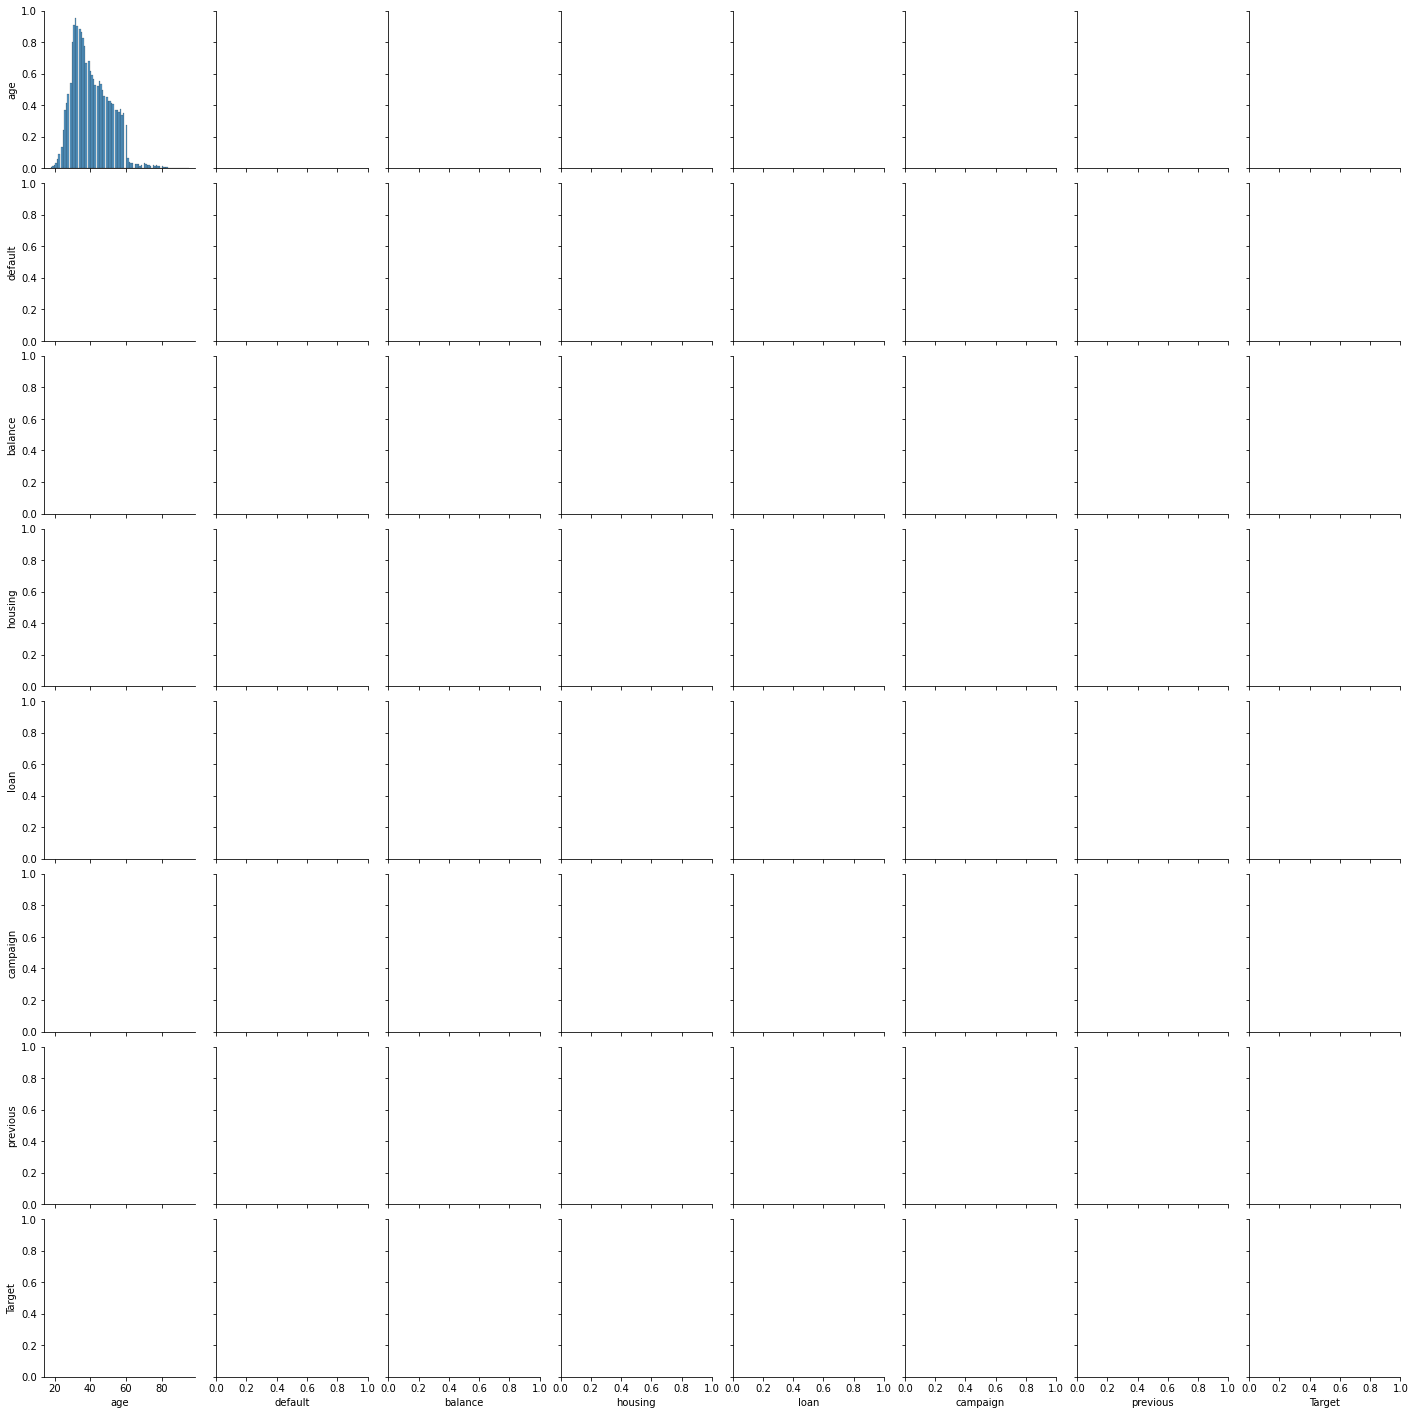

In [30]:
sns.pairplot(df2)

In [ ]:
Dataframe.columns

# Train Test Split

In [ ]:
X = df2.drop('Target',axis=1) 
y = df2['Target'] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)


# Scaling of columns

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

# Models

# Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,y_pred))
print('2.Classification Report:',classification_report(y_test,y_pred))
print('3.Accuracy score:',accuracy_score(y_test,y_pred))

# Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train_scaled,y_train)
ypred1 = NB.predict(X_test_scaled)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,ypred1))
print('2.Classification Report:',classification_report(y_test,ypred1))
print('3.Accuracy score:',accuracy_score(y_test,ypred1))

# K Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
ypred2 = knn.predict(X_test_scaled)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,ypred2))
print('2.Classification Report:',classification_report(y_test,ypred2))
print('3.Accuracy score:',accuracy_score(y_test,ypred2))

In [ ]:
oddList = list(np.arange(1,15))
neighbors = list(filter(lambda x: x % 2 != 0, oddList))

accuracy_list = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_s = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy_s)
    
MSE=[1 - j for j in accuracy_list]

optimal = neighbors[MSE.index(min(MSE))]
print('optimal k is',optimal)

plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# SVM

In [ ]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
ypred3 = svc.predict(X_test_scaled)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,ypred3))
print('2.Classification Report:',classification_report(y_test,ypred3))
print('3.Accuracy score:',accuracy_score(y_test,ypred3))

# Ensembling Models

# Decison Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled,y_train)
ypred4 = dtree.predict(X_test_scaled)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,ypred4))
print('2.Classification Report:',classification_report(y_test,ypred4))
print('3.Accuracy score:',accuracy_score(y_test,ypred4))

# Feature importance test for decision tree

In [ ]:

xvar = df2.drop('Target', axis=1)
feature_cols = xvar.columns
feat_importance = dtree.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, dtree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

In [ ]:
dTreeR = DecisionTreeClassifier(criterion= 'gini',max_depth= 3,random_state= 1)
dTreeR.fit(X_train_scaled,y_train)
ypred5 = dTreeR.predict(X_test_scaled)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,ypred5))
print('2.Classification Report:',classification_report(y_test,ypred5))
print('3.Accuracy score:',accuracy_score(y_test,ypred5))

# Bagging

In [ ]:
bagc = BaggingClassifier(base_estimator=dtree, n_estimators=500,random_state=1)
bagc.fit(X_train,y_train)
ypred6 = bagc.predict(X_test)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,ypred6))
print('2.Classification Report:',classification_report(y_test,ypred6))
print('3.Accuracy score:',accuracy_score(y_test,ypred6))

# Adaptive Boosting

In [ ]:
adab = AdaBoostClassifier(n_estimators=50,random_state=1)
adab = adab.fit(X_train,y_train)
adapred = adab.predict(X_test)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,adapred))
print('2.Classification Report:',classification_report(y_test,adapred))
print('3.Accuracy score:',accuracy_score(y_test,adapred))

# Gradient Boosting

In [ ]:
gradb = GradientBoostingClassifier(n_estimators=100,random_state=1)
gradb = gradb.fit(X_train,y_train)
gradped = gradb.predict(X_test)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,gradped))
print('2.Classification Report:',classification_report(y_test,gradped))
print('3.Accuracy score:',accuracy_score(y_test,gradped))

# Random Forest

In [ ]:
randf = RandomForestClassifier(n_estimators=500,random_state=1,max_features=5)
randf = randf.fit(X_train,y_train)
randfpred = randf.predict(X_test)

In [ ]:
print('1.Confusion Matrix :\n',confusion_matrix(y_test,randfpred))
print('2.Classification Report:',classification_report(y_test,randfpred))
print('3.Accuracy score:',accuracy_score(y_test,randfpred))

# models With Accuracy Scores

In [ ]:
Scores = [('Naive bayes', accuracy_score(y_test,ypred1)),
      ('KNN', accuracy_score(y_test,ypred2)),
      ('Logistic Regression', accuracy_score(y_test,y_pred)),
      ('SVC', accuracy_score(y_test,ypred3) ),
      ('Decision Tree',accuracy_score(y_test,ypred4)),
      ('Decision Tree with Regularization',accuracy_score(y_test,ypred5)),
      ('Bagging',accuracy_score(y_test,ypred6)),
      ('Adaptive Boosting',accuracy_score(y_test,adapred)),
      ('Gradient Boosting',accuracy_score(y_test,gradped)),
      ('Random Forest N=500',accuracy_score(y_test,randfpred))]

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score'])

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False)

In [ ]:

sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()

# Conclusion:

# Comments on dataset:

# Comments on Models:

# Miscellaneous Comments: